In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plotter
%matplotlib inline

In [2]:
#independent variable
volume = np.linspace(2,222,111)

#dependent vartiables
file = open('AQ_flux.txt', 'r') 
AQ_data = file.read().strip()
file.close()
file = open('PBI_flux.txt', 'r') 
PBI_data = file.read().strip()
file.close()
file = open('PVA_flux.txt', 'r') 
PVA_data = file.read().strip()
file.close()

 Read in Flux data


In [3]:
ppm_to_M = 1/58.4e3     # [1ppm = 1 mg/L = 1 mol /58.4e3 mg / L = [M]]
days_to_sec = 1 * 24 * 60 * 60
def getData(v1):
  ar = []
  for spl in v1.splitlines():
    dar = spl.split()
    dar = dar[1:]
    dar2 = [np.float(s) for s in dar]
    #print dar2
    ar.append(dar2)
  ar = np.asarray(ar)
  #print "printing ar", ar
  #ar[:,0]*=days_to_sec
  #ar[:,1]*=ppm_to_M  
  #ar[:,2]*=ppm_to_M  
  return ar  
    
    

In [4]:
AQ_flux = getData(AQ_data)
PVA_flux = getData(PVA_data)
PBI_flux = getData(PBI_data)

Water_means = [np.average(PBI_flux),np.average(PVA_flux),np.average(AQ_flux)]
Water_std = [np.std(PBI_flux),np.std(PVA_flux),np.std(AQ_flux)]

In [5]:
print(np.average(PVA_flux/AQ_flux))

0.3860715908638589


In [6]:
freePores = [0.49762512, 0.64333092, 0.36471746]
print(np.average(freePores))


0.5018911666666667


Data from ion flux across the membrane

In [7]:
PBI_mean = 1.0294373595341794e-06 *10**7
PVA_mean =  9.050330852717195e-07 *10**7
AQ_mean =  4.478926839010504e-07 *10**7

PBI_std =  2.274582275457724e-07 *10**7
PVA_std =  1.9660347564233754e-07 *10**7
AQ_std =  1.1458583674317008e-07*10**7


In [8]:
Ion_means = [PBI_mean,PVA_mean,AQ_mean]
Ion_std = [PBI_std, PVA_std, AQ_std]

In [9]:
Ion_means

[10.294373595341794, 9.050330852717195, 4.478926839010504]

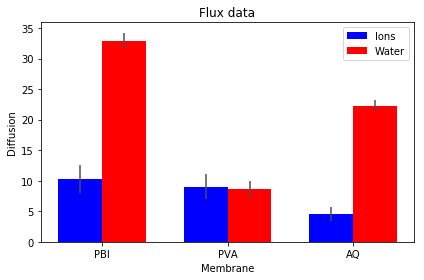

In [10]:
fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.35
error_config = {'ecolor': '0.3'}
rects1 = ax.bar(index,Ion_means, bar_width, color='b',yerr = Ion_std, error_kw=error_config,label='Ions')
rects2 = ax.bar(index+bar_width,Water_means, bar_width, color='r',yerr = Water_std, error_kw=error_config,label='Water')
ax.set_xlabel('Membrane')
ax.set_ylabel('Diffusion')
ax.set_title('Flux data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('PBI', 'PVA', 'AQ'))
ax.legend()

fig.tight_layout()
plt.show()


Now for the more interesting case of putting the data into context:
The left bar will nowe represent the change in conductivity across the membrane as a ratio of one membrane compared to the others, and the same will be done for water permeation across the membrane for the right chart


In [11]:
Ion_ints = [PVA_mean/PBI_mean,AQ_mean/PBI_mean,AQ_mean/PVA_mean]
apbi =np.average(PBI_flux)
apva = np.average(PVA_flux)
aaq = np.average(AQ_flux)
Water_ints = [apva/apbi,aaq/apbi,aaq/apva]

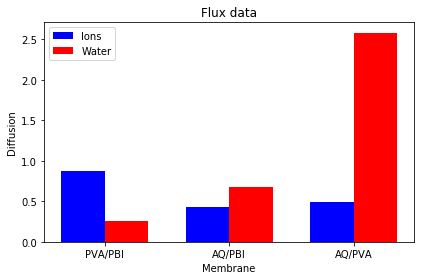

In [12]:
fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.35
error_config = {'ecolor': '0.3'}
rects1 = ax.bar(index,Ion_ints, bar_width, color='b',label='Ions')
rects2 = ax.bar(index+bar_width,Water_ints, bar_width, color='r',label='Water')
ax.set_xlabel('Membrane')
ax.set_ylabel('Diffusion')
ax.set_title('Flux data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('PVA/PBI', 'AQ/PBI', 'AQ/PVA'))
ax.legend(loc=2)

fig.tight_layout()
plt.show()


In better context:
$ \frac{1}{Water_{ints[2]}}$ to find the number of free pores as this represents the number of pores that are n

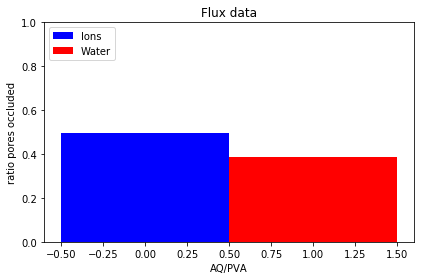

In [13]:
fig, ax = plt.subplots()
index = np.arange(1)
bar_width = 1
error_config = {'ecolor': '0.3'}
rects1 = ax.bar(index,Ion_ints[2], bar_width, color='b',label='Ions')
rects2 = ax.bar(index+bar_width,1/Water_ints[2], bar_width, color='r',label='Water')
ax.set_xlabel('AQ/PVA')
ax.set_ylabel('ratio pores occluded')
ax.set_title('Flux data')
ax.legend(loc=2)
plotter.ylim(ymax=1)
fig.tight_layout()
plt.show()


In [14]:
1/Water_ints[2]

0.38758500834275034